In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [119]:
df = pd.read_csv("/workspaces/CS_Group_09_Salary_prediction/data/Salary_Data.csv")

print("Path to dataset files:", df)

Path to dataset files:        Age  Gender    Education Level              Job Title  \
0     32.0    Male         Bachelor's      Software Engineer   
1     28.0  Female           Master's           Data Analyst   
2     45.0    Male                PhD         Senior Manager   
3     36.0  Female         Bachelor's        Sales Associate   
4     52.0    Male           Master's               Director   
...    ...     ...                ...                    ...   
6699  49.0  Female                PhD  Director of Marketing   
6700  32.0    Male        High School        Sales Associate   
6701  30.0  Female  Bachelor's Degree      Financial Manager   
6702  46.0    Male    Master's Degree      Marketing Manager   
6703  26.0  Female        High School        Sales Executive   

      Years of Experience    Salary  
0                     5.0   90000.0  
1                     3.0   65000.0  
2                    15.0  150000.0  
3                     7.0   60000.0  
4                 

In [120]:
# Display basic info
print(df.shape)
print(df.info())
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Show first few rows
print(df.head())

def clean_text(text):
    if isinstance(text, str):
        text = text.strip().lower()
        text = text.replace("’", "'")
        text = text.replace(" degree", "")  # Remove word 'degree'
        text = text.replace("bachelors", "bachelor's")
        text = text.replace("masters", "master's")
        text = text.replace("phd", "phd")
        
    return text

df['Education Level'] = df['Education Level'].apply(clean_text)
print("Cleaned Education Levels:", df['Education Level'].unique())


#drop duplicates
df = df.drop_duplicates()



(6704, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB
None
               Age  Years of Experience         Salary
count  6702.000000          6701.000000    6699.000000
mean     33.620859             8.094687  115326.964771
std       7.614633             6.059003   52786.183911
min      21.000000             0.000000     350.000000
25%      28.000000             3.000000   70000.000000
50%      32.000000             7.000000  115000.000000
75%      38.000000            12.000000 

In [121]:

# Function to remove outliers using IQR
def remove_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

df_cleaned = remove_outliers_iqr(df, ['Salary'])
df_cleaned = df_cleaned[df_cleaned['Salary'] > 1000]  # Keep realistic values
df_cleaned = df_cleaned.reset_index(drop=True)
print(f"Original rows: {len(df)}, Cleaned rows: {len(df_cleaned)}")
df.duplicated().sum()


Original rows: 1791, Cleaned rows: 1783


np.int64(0)

In [122]:
df['Gender'] = df['Gender'].astype('category')
df['Education Level'] = df['Education Level'].astype('category')
df['Job Title'] = df['Job Title'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1791 entries, 0 to 6631
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  1790 non-null   float64 
 1   Gender               1790 non-null   category
 2   Education Level      1789 non-null   category
 3   Job Title            1790 non-null   category
 4   Years of Experience  1789 non-null   float64 
 5   Salary               1787 non-null   float64 
dtypes: category(3), float64(3)
memory usage: 68.9 KB


In [123]:
df['Age'] = df['Age'].astype(float)
df['Years of Experience'] = df['Years of Experience'].astype(float)
df['Salary'] = df['Salary'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1791 entries, 0 to 6631
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  1790 non-null   float64 
 1   Gender               1790 non-null   category
 2   Education Level      1789 non-null   category
 3   Job Title            1790 non-null   category
 4   Years of Experience  1789 non-null   float64 
 5   Salary               1787 non-null   float64 
dtypes: category(3), float64(3)
memory usage: 68.9 KB


In [124]:
# Check for missing values
df.isnull().sum()
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)

In [125]:
# Check how many duplicate rows exist
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")

# Display duplicate rows
# print(duplicate_rows)

Number of duplicate rows: 0


In [126]:
# Remove duplicate rows (keeps first occurrence by default)
df = df.drop_duplicates()

# Reset index if needed
df.reset_index(drop=True, inplace=True)

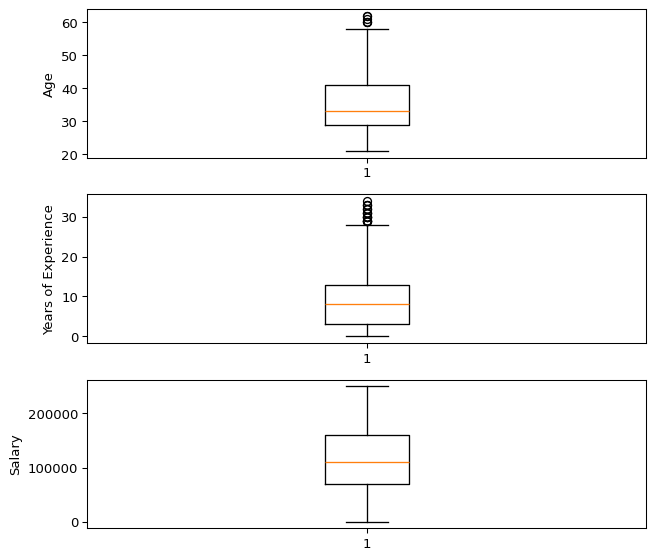

In [127]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

fig, axs = plt.subplots(len(numeric_cols), 1, dpi=95, figsize=(7, len(numeric_cols) * 2))
i = 0
for col in numeric_cols:
    axs[i].boxplot(df[col], vert=True) # Set vert=False for horizontal boxplots
    axs[i].set_ylabel(col)
    i+=1
plt.tight_layout()
plt.show()

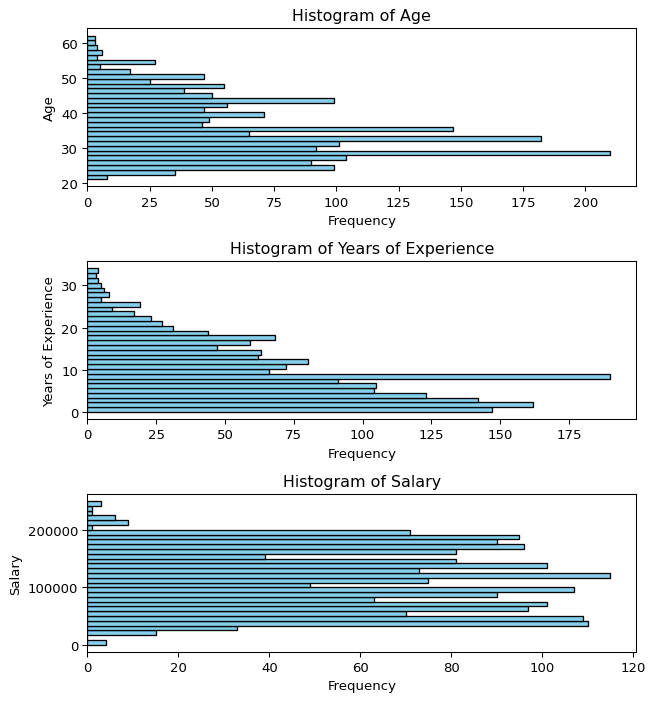

In [128]:
import matplotlib.pyplot as plt
import numpy as np

# Select only numerical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Create one subplot per numeric column
fig, axs = plt.subplots(len(numeric_cols), 1, dpi=95, figsize=(7, len(numeric_cols) * 2.5))

# Loop through each column and plot its histogram
for i, col in enumerate(numeric_cols):
    axs[i].hist(df[col], bins=30, color='skyblue', edgecolor='black', orientation='horizontal') # Set orientation='horizontal' for horizontal histograms
    axs[i].set_title(f"Histogram of {col}")
    axs[i].set_xlabel("Frequency") # Swap xlabel and ylabel for horizontal
    axs[i].set_ylabel(col) # Swap xlabel and ylabel for horizontal

plt.tight_layout()
plt.show()

In [129]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import pandas as pd

# Select numeric columns only
numeric_cols = df.select_dtypes(include='number').columns

# Create subplot layout
fig = make_subplots(rows=len(numeric_cols), cols=1, shared_xaxes=False,
                    subplot_titles=[f'Boxplot of {col}' for col in numeric_cols],
                    vertical_spacing=0.1)

# Add one boxplot per numeric column
for i, col in enumerate(numeric_cols, start=1):
    fig.add_trace(
        go.Box(x=df[col], name=col, orientation='h', marker_color='lightblue'),
        row=i, col=1
    )

# Update layout
fig.update_layout(height=300 * len(numeric_cols), title_text="Boxplots for All Numerical Columns", showlegend=True)

fig.show()


In [130]:
features = ['Age','Gender', 'Education Level', 'Job Title','Years of Experience']
target = 'Salary'

In [131]:
from sklearn.preprocessing import LabelEncoder

for col in features:
    if df[col].dtype == 'category':
        df[col] = LabelEncoder().fit_transform(df[col])


In [132]:
from sklearn.model_selection import train_test_split

X = df[features]
y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [133]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)


,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [134]:
y_pred = model.predict(X_test)


In [135]:

print("Test R² Score:", r2_score(y_test, y_pred))
print("Mean Salary:", df['Salary'].mean())
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred)))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))


Test R² Score: 0.8278311805664894
Mean Salary: 113220.03751399776
Mean Absolute Error (MAE): 12348.14459962756
RMSE: 22144.621416460574
Mean Squared Error (MSE): 490384257.67836434


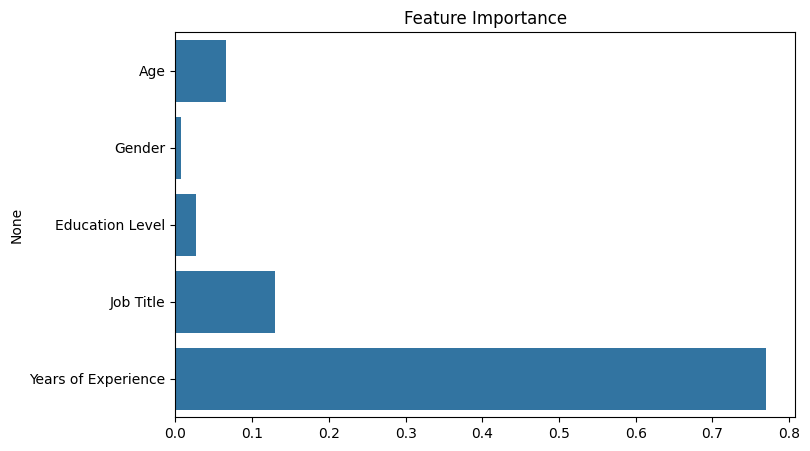

In [136]:
# Plot feature importance
plt.figure(figsize=(8,5))
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.title("Feature Importance")
plt.show()


In [137]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 5, 7, 9, 12, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error']
}

grid = GridSearchCV(model, param_grid, cv=5, scoring='r2')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
best_model = grid.best_estimator_

# Evaluate tuned model
y_pred_best = best_model.predict(X_test)
print("Improved R² Score:", r2_score(y_test, y_pred_best))
print("R² Score:", r2_score(y_test, y_pred_best))
print("Mean Salary:", df['Salary'].mean())
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_best))
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred_best)))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_best))



Best Parameters: {'criterion': 'squared_error', 'max_depth': 12, 'min_samples_leaf': 4, 'min_samples_split': 2}
Improved R² Score: 0.8313770454972389
R² Score: 0.8313770454972389
Mean Salary: 113220.03751399776
Mean Absolute Error (MAE): 14415.966622328635
RMSE: 21915.39771268225
Mean Squared Error (MSE): 480284656.90503836


In [138]:
# Evaluate model on training data
y_train_pred = best_model.predict(X_train)

print("Train R²:", r2_score(y_train, y_train_pred))
print("Test R²:", r2_score(y_test, y_pred_best))


Train R²: 0.928947724171687
Test R²: 0.8313770454972389


In [139]:
tuned_model = DecisionTreeRegressor(
    random_state=42,
    max_depth=8,             # limit tree depth (try 5–10)
    min_samples_split=20,    # increase to make splits less frequent
    min_samples_leaf=5       # increase to make leaf nodes contain more samples
)
tuned_model.fit(X_train, y_train)

y_pred_tuned = tuned_model.predict(X_test)
print("New R²:", r2_score(y_test, y_pred_tuned))


New R²: 0.8059584634872548


In [140]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(best_model, X, y, cv=5, scoring='r2')
print("Cross-validation R² scores:", scores)
print("Average R²:", scores.mean())


Cross-validation R² scores: [0.60642059 0.14144573 0.6832724  0.63547489 0.6986792 ]
Average R²: 0.5530585610402265


In [141]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42
)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest R²:", r2_score(y_test, y_pred_rf))

# Cross-validation for RF
from sklearn.model_selection import cross_val_score
rf_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')
print("RF Cross-validation R² scores:", rf_scores)
print("Average RF R²:", rf_scores.mean())


Random Forest R²: 0.8641590463304724
RF Cross-validation R² scores: [0.63408272 0.25102097 0.80217565 0.7632943  0.7555028 ]
Average RF R²: 0.6412152888511246


In [142]:
models = {
    'Decision Tree': tuned_model,
    'Random Forest': rf_model,
    # 'Gradient Boosting': gb_model
}

for name, m in models.items():
    scores = cross_val_score(m, X, y, cv=5, scoring='r2')
    print(f"{name}: Mean CV R² = {scores.mean():.3f}, Std = {scores.std():.3f}")


Decision Tree: Mean CV R² = 0.564, Std = 0.216
Random Forest: Mean CV R² = 0.641, Std = 0.203


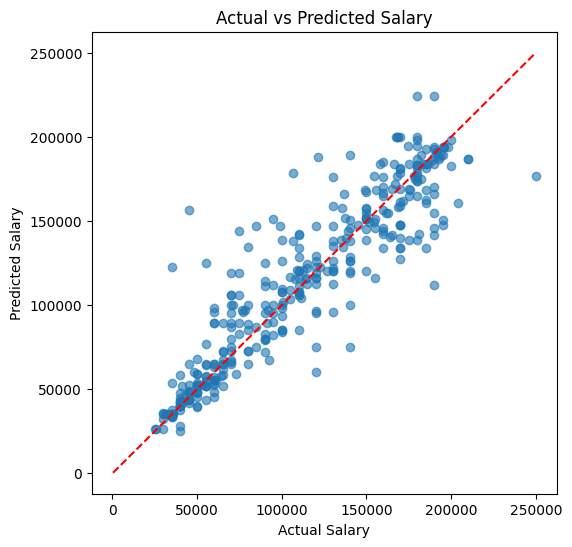

In [143]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_best, alpha=0.6)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()


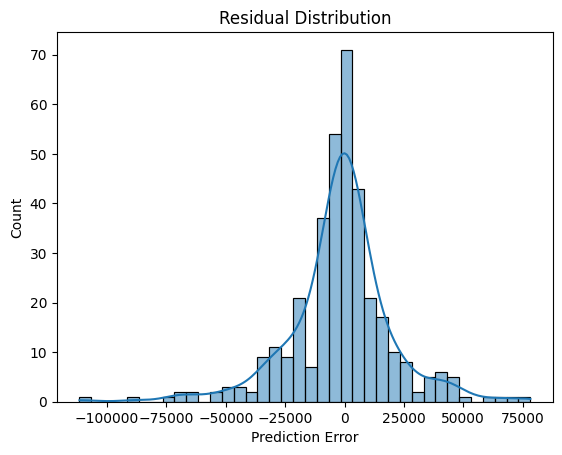

In [144]:
residuals = y_test - y_pred_best
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.xlabel("Prediction Error")
plt.show()


In [145]:
# Evaluate tuned model
y_pred_best = best_model.predict(X_test)
print("Improved R² Score:", r2_score(y_test, y_pred_best))
print("R² Score:", r2_score(y_test, y_pred_best))
print("Mean Salary:", df['Salary'].mean())
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred_best))
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_pred_best)))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_best))

Improved R² Score: 0.8313770454972389
R² Score: 0.8313770454972389
Mean Salary: 113220.03751399776
Mean Absolute Error (MAE): 14415.966622328635
RMSE: 21915.39771268225
Mean Squared Error (MSE): 480284656.90503836


In [146]:
import joblib
joblib.dump(best_model, "decision_tree_salary_model.pkl")


['decision_tree_salary_model.pkl']